### Libraries

In [38]:
import pandas as pd
import numpy as np

import warnings
import os

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import RepeatedKFold


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.font_manager import FontProperties
from matplotlib.gridspec import GridSpec

import shap

In [39]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
warnings.filterwarnings("ignore")
os.chdir("C:\\Users\\joaos\\Documents\\GitHub\\pred_se_ml\\data")

### Importing the data

In [40]:
# Importing the data
df = pd.read_csv("df.csv")

print(df.shape)

(1342, 23)


In [41]:
df.head()

,FDI,Property Time,Cost Procedures,Business Time,Business Procedure,Tribute Time,Government Spending,Exchange,Inflation,gdp_pc,Unemployment,Tax Burden,Diversity,Quality,Shadow Economy,Autocracy,Closed Anocracy,Democracy,Dem. Full,Dem. Interregnum,Dem. Interruption,Open Anocracy,Dem. Transition
0,9.329239,335.0,910.0,83.0,12.0,289.0,14.312063,103.579947,33.443595,1254.696126,23.6430,84.916689,6.330621,0.40,46.81,0,1,0,0,0,0,0,0
1,-3.526657,335.0,653.8,83.0,12.0,284.0,16.029037,106.590962,42.374249,1900.723816,12.6408,84.916689,6.245515,0.42,43.84,0,1,0,0,0,0,0,0
2,-0.072001,335.0,498.2,83.0,12.0,284.0,15.341722,94.625159,17.115665,2597.963585,12.6408,84.900000,6.295336,0.40,41.23,0,1,0,0,0,0,0,0
3,-1.368762,335.0,343.7,83.0,12.0,284.0,15.536935,108.060068,4.308432,3121.348735,12.6408,85.000000,6.211946,0.45,37.13,0,1,0,0,0,0,0,0
4,1.896314,335.0,196.8,68.0,8.0,284.0,16.814612,121.364708,19.365774,4081.717497,12.6408,85.175100,6.315526,0.47,35.26,0,1,0,0,0,0,0,0


In [42]:
# Missing data by column (%)
df.isnull().mean().sort_values(ascending=False).head()

FDI                  0.0
Diversity            0.0
Open Anocracy        0.0
Dem. Interruption    0.0
Dem. Interregnum     0.0
dtype: float64

In [43]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FDI                  1342 non-null   float64
 1   Property Time        1342 non-null   float64
 2   Cost Procedures      1342 non-null   float64
 3   Business Time        1342 non-null   float64
 4   Business Procedure   1342 non-null   float64
 5   Tribute Time         1342 non-null   float64
 6   Government Spending  1342 non-null   float64
 7   Exchange             1342 non-null   float64
 8   Inflation            1342 non-null   float64
 9   gdp_pc               1342 non-null   float64
 10  Unemployment         1342 non-null   float64
 11  Tax Burden           1342 non-null   float64
 12  Diversity            1342 non-null   float64
 13  Quality              1342 non-null   float64
 14  Shadow Economy       1342 non-null   float64
 15  Autocracy            1342 non-null   i

In [44]:
df.describe()

,FDI,Property Time,Cost Procedures,Business Time,Business Procedure,Tribute Time,Government Spending,Exchange,Inflation,gdp_pc,Unemployment,Tax Burden,Diversity,Quality,Shadow Economy,Autocracy,Closed Anocracy,Democracy,Dem. Full,Dem. Interregnum,Dem. Interruption,Open Anocracy,Dem. Transition
count,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000
mean,5.591769,58.622652,48.872092,36.891141,8.788040,307.688645,15.407238,85.966697,7.008827,14715.864455,7.490088,74.904297,3.200705,0.830477,28.735224,0.139344,0.094635,0.339046,0.263040,0.004471,0.000745,0.151267,0.007452
std,14.912115,70.412758,120.258551,61.356886,3.487579,290.520169,5.201511,49.036086,8.886334,20682.238204,5.204071,12.786663,1.202226,0.162143,13.134395,0.346435,0.292819,0.473562,0.440448,0.066740,0.027298,0.358442,0.086032
min,-57.532314,1.000000,0.000000,0.500000,1.000000,27.000000,2.047121,22.105976,-24.218101,128.538423,0.200000,32.000000,1.422673,0.240000,6.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.400117,19.000000,4.600000,12.000000,6.000000,173.000000,11.515631,54.876654,2.001765,1494.362078,4.014333,67.511900,2.176529,0.760000,18.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.037787,36.000000,14.800000,22.000000,9.000000,252.880000,15.017622,75.739638,4.820533,5175.197376,6.357000,77.000000,2.965177,0.860000,28.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.845566,68.000000,44.475000,41.000000,11.000000,336.000000,18.744087,104.941535,9.411557,19028.215779,9.624500,83.500000,4.040709,0.960000,37.335000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,280.145510,690.000000,1491.600000,697.000000,20.000000,2600.000000,43.482316,437.326715,95.408660,123678.702143,35.460000,99.942400,6.330621,1.100000,69.080000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Log GDP

In [45]:
df['Log. GDP Per Capita'] = np.log(df['gdp_pc'])
df = df.drop('gdp_pc', axis=1)

### Spliting between train and test

In [46]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=0)

In [47]:
print(train_set.shape)
print(test_set.shape)

(1073, 23)
(269, 23)


### Data padronization

In [48]:
# train set
X_train = train_set.drop('Shadow Economy', axis=1)
y_train = train_set['Shadow Economy']

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

In [49]:
# test set
X_test = test_set.drop('Shadow Economy', axis=1)
y_test = test_set['Shadow Economy']

X_test_scaled = scaler.transform(X_test)

### Regressions

#### Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression

# Params set
linear_param_grid = {
    'fit_intercept': [True, False],
    'copy_X':[True, False]
}

# Create a linear regression model
linear_model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Perform Grid Search with cross-validation
linear_grid_search = GridSearchCV(linear_model, 
                                  linear_param_grid, 
                                  scoring='neg_mean_absolute_percentage_error', 
                                  cv=kf,
                                  n_jobs=-1)

# Fitting the model
linear_grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("\nBest Parameters: ", linear_grid_search.best_params_)

# Get the best model
linear_best_model = linear_grid_search.best_estimator_

# Store fold scores for later calculations
all_fold_scores = []

# Print the mean and standard deviation of each fold in percentage
for i, (train_idx, test_idx) in enumerate(kf.split(X_train_scaled, y_train)):
    fold_scores = -linear_grid_search.cv_results_['split{}_test_score'.format(i)]
    all_fold_scores.extend(fold_scores)  # Store fold scores for later calculations
    mean_fold_score = np.mean(fold_scores) * 100
    std_fold_score = np.std(fold_scores) * 100  

    print(f'Mean score for fold {i + 1}: {mean_fold_score:.2f}%, Standard Deviation: {std_fold_score:.2f}%')

# Calculate and print global mean and standard deviation
global_mean = np.mean(all_fold_scores) * 100
global_std = np.std(all_fold_scores) * 100
print(f'Global Mean: {global_mean:.2f}%, Global Standard Deviation: {global_std:.2f}%\n')

# Predictions and evaluations on test set
y_test_pred = linear_grid_search.predict(X_test_scaled)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE) on test set: {mape_test:.2f}% \n')


Best Parameters:  {'copy_X': True, 'fit_intercept': True}
Mean score for fold 1: 25.47%, Standard Deviation: 0.01%
Mean score for fold 2: 24.14%, Standard Deviation: 0.00%
Mean score for fold 3: 22.87%, Standard Deviation: 0.02%
Mean score for fold 4: 26.53%, Standard Deviation: 0.35%
Mean score for fold 5: 26.22%, Standard Deviation: 0.05%
Global Mean: 25.05%, Global Standard Deviation: 1.38%

Mean Absolute Percentage Error (MAPE) on test set: 27.77% 



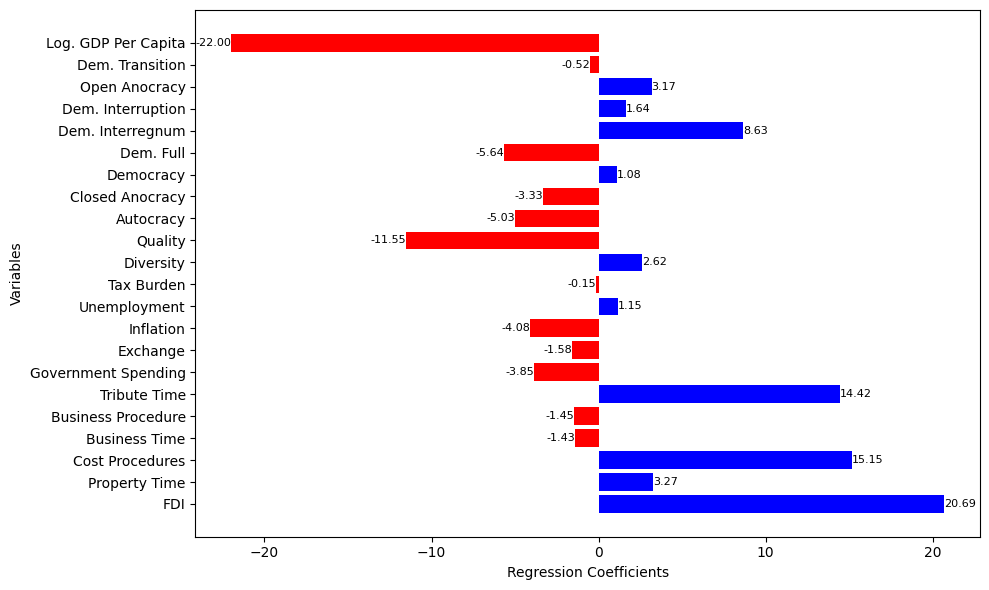

In [14]:
coeficientes = linear_best_model.coef_
colors = ['red' if coef < 0 else 'blue' for coef in coeficientes]
plt.figure(figsize=(10, 6))


variables_names = X_train.columns.tolist()

plt.barh(variables_names, coeficientes, color=colors)
plt.xlabel('Regression Coefficients')
plt.ylabel('Variables')


for i, coef in enumerate(coeficientes):
    if coef < 0:
        plt.text(coef, i, f'{coef:.2f}', ha='right', va='center', color='black', fontsize=8)
    else:
        plt.text(coef, i, f'{coef:.2f}', ha='left', va='center', color='black', fontsize=8)
  
plt.tight_layout()

        
plt.show()

### Lasso

In [96]:
from sklearn.linear_model import Lasso

lasso_param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'alpha': [1e-5, 1e-4, 1e-3, 0.01, 0.1, 1.0, 10.0, 100.0],  
    'max_iter': [1000, 2000, 3000, 5000]  
}

# Create a lasso model
lasso_model = Lasso(random_state=0)

kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Perform Grid Search with cross-validation
lasso_grid_search = GridSearchCV(lasso_model, 
                                  lasso_param_grid, 
                                  scoring='neg_mean_absolute_percentage_error', 
                                  cv=kf,
                                  n_jobs=-1)

# Fitting the model
lasso_grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("\nBest Parameters: ", lasso_grid_search.best_params_)

# Get the best model
lasso_best_model = lasso_grid_search.best_estimator_

# Store fold scores for later calculations
all_fold_scores = []

# Print the mean and standard deviation of each fold in percentage
for i, (train_idx, test_idx) in enumerate(kf.split(X_train_scaled, y_train)):
    fold_scores = -lasso_grid_search.cv_results_['split{}_test_score'.format(i)]
    all_fold_scores.extend(fold_scores)  # Store fold scores for later calculations
    mean_fold_score = np.mean(fold_scores) * 100
    std_fold_score = np.std(fold_scores) * 100  

    print(f'Mean score for fold {i + 1}: {mean_fold_score:.2f}%, Standard Deviation: {std_fold_score:.2f}%')

# Calculate and print global mean and standard deviation
global_mean = np.mean(all_fold_scores) * 100
global_std = np.std(all_fold_scores) * 100
print(f'Global Mean: {global_mean:.2f}%, Global Standard Deviation: {global_std:.2f}%\n')

# Predictions and evaluations on test set
y_test_pred = lasso_grid_search.predict(X_test_scaled)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print(f'\nMean Absolute Percentage Error (MAPE) on test set: {mape_test:.2f}% \n')


Best Parameters:  {'alpha': 1e-05, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000}
Mean score for fold 1: 38.87%, Standard Deviation: 20.48%
Mean score for fold 2: 35.44%, Standard Deviation: 19.15%
Mean score for fold 3: 33.08%, Standard Deviation: 19.49%
Mean score for fold 4: 37.93%, Standard Deviation: 19.34%
Mean score for fold 5: 37.84%, Standard Deviation: 19.22%
Global Mean: 36.63%, Global Standard Deviation: 19.66%


Mean Absolute Percentage Error (MAPE) on test set: 27.77% 



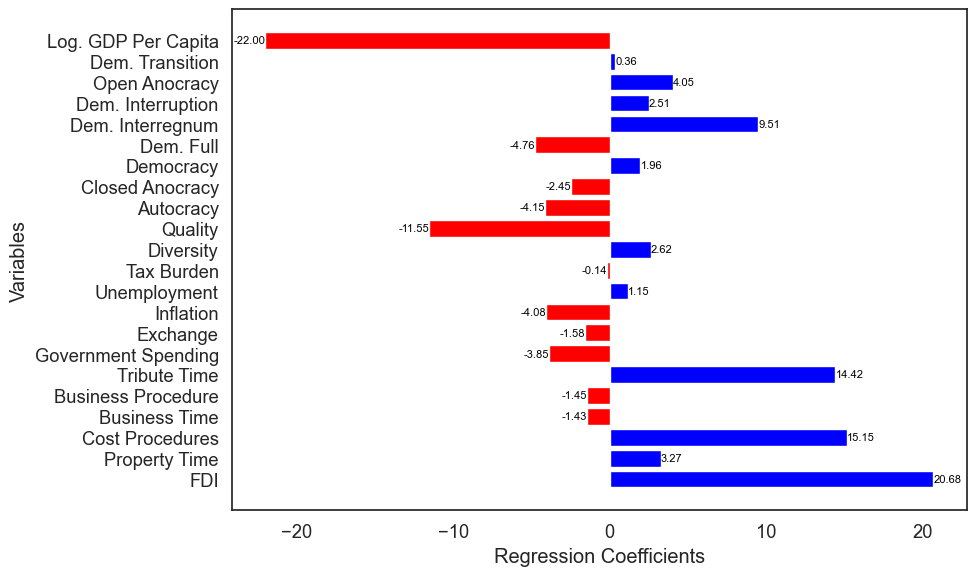

In [95]:
lasso_coeficients = lasso_best_model.coef_
colors = ['red' if coef < 0 else 'blue' for coef in lasso_coeficients]
plt.figure(figsize=(10, 6))


variables_names = X_train.columns.tolist()

plt.barh(variables_names, lasso_coeficients, color=colors)
plt.xlabel('Regression Coefficients')
plt.ylabel('Variables')


for i, coef in enumerate(lasso_coeficients):
    if coef < 0:
        plt.text(coef, i, f'{coef:.2f}', ha='right', va='center', color='black', fontsize=8)
    else:
        plt.text(coef, i, f'{coef:.2f}', ha='left', va='center', color='black', fontsize=8)
  
plt.tight_layout()

        
plt.show()

### Ridge

In [97]:
from sklearn.linear_model import Ridge

ridge_param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'alpha': [0.1, 0.5, 1.0, 1.5],  
    'max_iter': [1000, 2000, 3000]  
}

# Create a lasso model
ridge_model = Ridge(random_state=0)

kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Perform Grid Search with cross-validation
ridge_grid_search = GridSearchCV(ridge_model, 
                                  ridge_param_grid, 
                                  scoring='neg_mean_absolute_percentage_error', 
                                  cv=kf,
                                  n_jobs=-1)

# Fitting the model
ridge_grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("\nBest Parameters: ", ridge_grid_search.best_params_)

# Get the best model
ridge_best_model = ridge_grid_search.best_estimator_

# Store fold scores for later calculations
all_fold_scores = []

# Print the mean and standard deviation of each fold in percentage
for i, (train_idx, test_idx) in enumerate(kf.split(X_train_scaled, y_train)):
    fold_scores = -ridge_grid_search.cv_results_['split{}_test_score'.format(i)]
    all_fold_scores.extend(fold_scores)  # Store fold scores for later calculations
    mean_fold_score = np.mean(fold_scores) * 100
    std_fold_score = np.std(fold_scores) * 100  

    print(f'Mean score for fold {i + 1}: {mean_fold_score:.2f}%, Standard Deviation: {std_fold_score:.2f}%')

# Calculate and print global mean and standard deviation
global_mean = np.mean(all_fold_scores) * 100
global_std = np.std(all_fold_scores) * 100
print(f'Global Mean: {global_mean:.2f}%, Global Standard Deviation: {global_std:.2f}%\n')
# Predictions and evaluations on test set
y_test_pred = ridge_best_model.predict(X_test_scaled)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE) on test set: {mape_test:.2f}% \n')


Best Parameters:  {'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000}
Mean score for fold 1: 25.91%, Standard Deviation: 0.55%
Mean score for fold 2: 24.89%, Standard Deviation: 0.88%
Mean score for fold 3: 22.76%, Standard Deviation: 0.09%
Mean score for fold 4: 26.40%, Standard Deviation: 0.12%
Mean score for fold 5: 26.64%, Standard Deviation: 0.51%
Global Mean: 25.32%, Global Standard Deviation: 1.51%

Mean Absolute Percentage Error (MAPE) on test set: 27.76% 



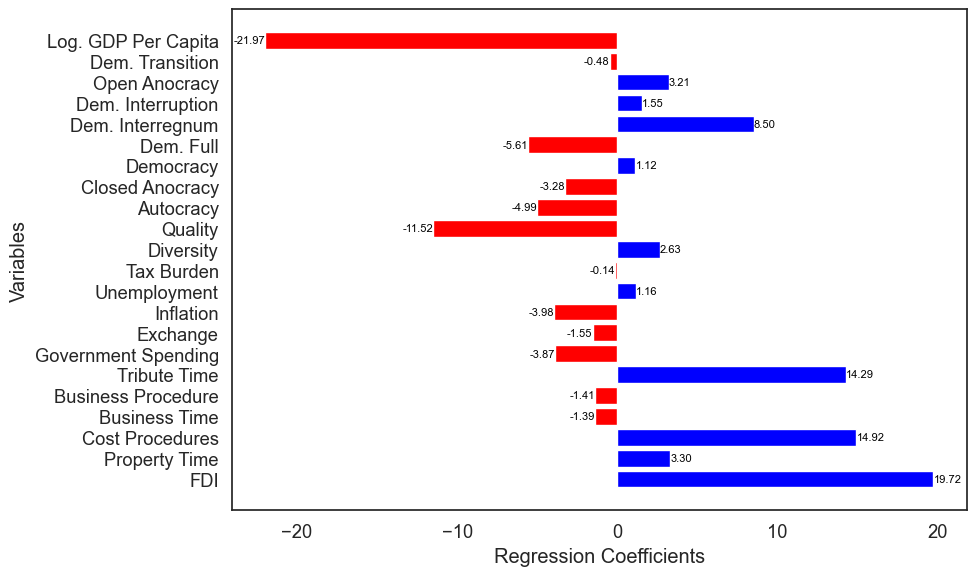

In [98]:
ridge_coeficients = ridge_best_model.coef_
colors = ['red' if coef < 0 else 'blue' for coef in ridge_coeficients]
plt.figure(figsize=(10, 6))


variables_names = X_train.columns.tolist()

plt.barh(variables_names, ridge_coeficients, color=colors)
plt.xlabel('Regression Coefficients')
plt.ylabel('Variables')


for i, coef in enumerate(ridge_coeficients):
    if coef < 0:
        plt.text(coef, i, f'{coef:.2f}', ha='right', va='center', color='black', fontsize=8)
    else:
        plt.text(coef, i, f'{coef:.2f}', ha='left', va='center', color='black', fontsize=8)
  
plt.tight_layout()

        
plt.show()

### ElasticNet

In [102]:
from sklearn.linear_model import ElasticNet

en_param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
              'l1_ratio': [0.25, 0.5, 0.75],
              'fit_intercept': [True, False],
              'max_iter': [1000, 2000, 3000],
              'tol': [1e-4, 1e-3, 1e-2]}

# Create a lasso model
en_model = ElasticNet(random_state=0)

kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Perform Grid Search with cross-validation
en_grid_search = GridSearchCV(en_model, 
                                  en_param_grid, 
                                  scoring='neg_mean_absolute_percentage_error', 
                                  cv=kf,
                                  n_jobs=-1)

# Fitting the model
en_grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("\nBest Parameters: ", en_grid_search.best_params_)

# Get the best model
en_best_model = en_grid_search.best_estimator_

# Store fold scores for later calculations
all_fold_scores = []

# Print the mean and standard deviation of each fold in percentage
for i, (train_idx, test_idx) in enumerate(kf.split(X_train_scaled, y_train)):
    fold_scores = -en_grid_search.cv_results_['split{}_test_score'.format(i)]
    all_fold_scores.extend(fold_scores)  # Store fold scores for later calculations
    mean_fold_score = np.mean(fold_scores) * 100
    std_fold_score = np.std(fold_scores) * 100  

    print(f'Mean score for fold {i + 1}: {mean_fold_score:.2f}%, Standard Deviation: {std_fold_score:.2f}%')

# Calculate and print global mean and standard deviation
global_mean = np.mean(all_fold_scores) * 100
global_std = np.std(all_fold_scores) * 100
print(f'Global Mean: {global_mean:.2f}%, Global Standard Deviation: {global_std:.2f}%\n')# Predictions and evaluations on test set
y_test_pred = en_grid_search.predict(X_test_scaled)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print(f'\nMean Absolute Percentage Error (MAPE) on test set: {mape_test:.2f}% \n')


Best Parameters:  {'alpha': 0.001, 'fit_intercept': True, 'l1_ratio': 0.75, 'max_iter': 1000, 'tol': 0.0001}
Mean score for fold 1: 40.92%, Standard Deviation: 16.67%
Mean score for fold 2: 36.96%, Standard Deviation: 15.70%
Mean score for fold 3: 33.72%, Standard Deviation: 16.77%
Mean score for fold 4: 39.46%, Standard Deviation: 15.85%
Mean score for fold 5: 38.96%, Standard Deviation: 15.77%
Global Mean: 38.00%, Global Standard Deviation: 16.35%


Mean Absolute Percentage Error (MAPE) on test set: 27.77% 



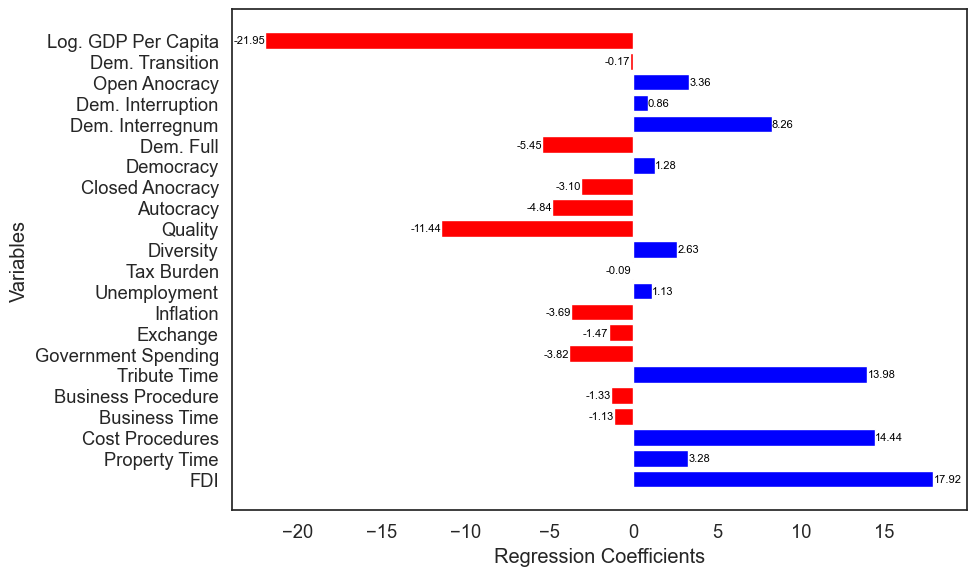

In [103]:
en_coeficients = en_best_model.coef_
colors = ['red' if coef < 0 else 'blue' for coef in en_coeficients]
plt.figure(figsize=(10, 6))


variables_names = X_train.columns.tolist()

plt.barh(variables_names, en_coeficients, color=colors)
plt.xlabel('Regression Coefficients')
plt.ylabel('Variables')


for i, coef in enumerate(en_coeficients):
    if coef < 0:
        plt.text(coef, i, f'{coef:.2f}', ha='right', va='center', color='black', fontsize=8)
    else:
        plt.text(coef, i, f'{coef:.2f}', ha='left', va='center', color='black', fontsize=8)
  
plt.tight_layout()

        
plt.show()

### RandomForest

In [109]:
from sklearn.ensemble import RandomForestRegressor

rf_param_grid = {
    'n_estimators': [100, 200, 300],  
    'criterion': ['friedman_mse', 'squared_error', 'poisson', 'absolute_error'],  
    'max_depth': [None, 5, 10],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt'],  
    'bootstrap': [True, False]  
}

model_randomforest = RandomForestRegressor(random_state=0)

kf = KFold(n_splits=5, shuffle=True, random_state=0)

rf_grid_search = GridSearchCV(model_randomforest, 
                                  rf_param_grid, 
                                  scoring='neg_mean_absolute_percentage_error', 
                                  cv=kf,
                                  n_jobs=-1)

# Fitting the model
rf_grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("\nBest Parameters: ", rf_grid_search.best_params_)

# Get the best model
rf_best_model = rf_grid_search.best_estimator_

# Store fold scores for later calculations
all_fold_scores = []

# Print the mean and standard deviation of each fold in percentage
for i, (train_idx, test_idx) in enumerate(kf.split(X_train_scaled, y_train)):
    fold_scores = -rf_grid_search.cv_results_['split{}_test_score'.format(i)]
    all_fold_scores.extend(fold_scores)  
    mean_fold_score = np.mean(fold_scores) * 100
    std_fold_score = np.std(fold_scores) * 100  

    print(f'Mean score for fold {i + 1}: {mean_fold_score:.2f}%, Standard Deviation: {std_fold_score:.2f}%')

# Calculate and print global mean and standard deviation
global_mean = np.mean(all_fold_scores) * 100
global_std = np.std(all_fold_scores) * 100
print(f'Global Mean: {global_mean:.2f}%, Global Standard Deviation: {global_std:.2f}%\n')

# Predictions and evaluations on test set
y_test_pred = rf_grid_search.predict(X_test_scaled)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print(f'\nMean Absolute Percentage Error (MAPE) on test set: {mape_test:.2f}% \n')


Best Parameters:  {'bootstrap': False, 'criterion': 'poisson', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mean score for fold 1: nan%, Standard Deviation: nan%
Mean score for fold 2: nan%, Standard Deviation: nan%
Mean score for fold 3: nan%, Standard Deviation: nan%
Mean score for fold 4: nan%, Standard Deviation: nan%
Mean score for fold 5: nan%, Standard Deviation: nan%
Global Mean: nan%, Global Standard Deviation: nan%


Mean Absolute Percentage Error (MAPE) on test set: 7.61% 



### SVR

In [111]:
from sklearn.svm import SVR

svr_param_grid = param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  
    'C': [0.1, 1.0, 10.0],  
    'epsilon': [0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto', 0.1, 1.0, 10.0]  
}

kf = KFold(n_splits=5, shuffle=True, random_state=0)

svr_grid_search = GridSearchCV(model_svr, 
                                  svr_param_grid, 
                                  scoring='neg_mean_absolute_percentage_error', 
                                  cv=kf,
                                  n_jobs=-1)

svr_grid_search.fit(X_train_scaled, y_train)

# Get the best model
svr_best_model = svr_grid_search.best_estimator_

# Print the best parameters
print("\nBest Parameters: ", svr_grid_search.best_params_)

# Get the best model
svr_best_model = svr_grid_search.best_estimator_

## Store fold scores for later calculations
all_fold_scores = []

# Print the mean and standard deviation of each fold in percentage
for i, (train_idx, test_idx) in enumerate(kf.split(X_train_scaled, y_train)):
    fold_scores = -svr_grid_search.cv_results_['split{}_test_score'.format(i)]
    all_fold_scores.extend(fold_scores)  # Store fold scores for later calculations
    mean_fold_score = np.mean(fold_scores) * 100
    std_fold_score = np.std(fold_scores) * 100  

    print(f'Mean score for fold {i + 1}: {mean_fold_score:.2f}%, Standard Deviation: {std_fold_score:.2f}%')

# Calculate and print global mean and standard deviation
global_mean = np.mean(all_fold_scores) * 100
global_std = np.std(all_fold_scores) * 100
print(f'Global Mean: {global_mean:.2f}%, Global Standard Deviation: {global_std:.2f}%\n')

# Predictions and evaluations on test set
y_test_pred = svr_grid_search.predict(X_test_scaled)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE) on test set: {mape_test:.2f}% \n')

Fitting 5 folds for each of 180 candidates, totalling 900 fits

Best Parameters:  {'C': 10.0, 'epsilon': 0.1, 'gamma': 10.0, 'kernel': 'rbf'}
Mean score for fold 1: 37.48%, Standard Deviation: 24.07%
Mean score for fold 2: 31.86%, Standard Deviation: 18.92%
Mean score for fold 3: 28.82%, Standard Deviation: 16.00%
Mean score for fold 4: 35.86%, Standard Deviation: 17.99%
Mean score for fold 5: 35.46%, Standard Deviation: 21.17%
Global Mean: 33.90%, Global Standard Deviation: 20.07%

Mean Absolute Percentage Error (MAPE) on test set: 8.42% 



In [113]:
explainer_sv = shap.Explainer(svr_best_model.predict, X_train)
shap_values_sv = explainer_sv(X_train)

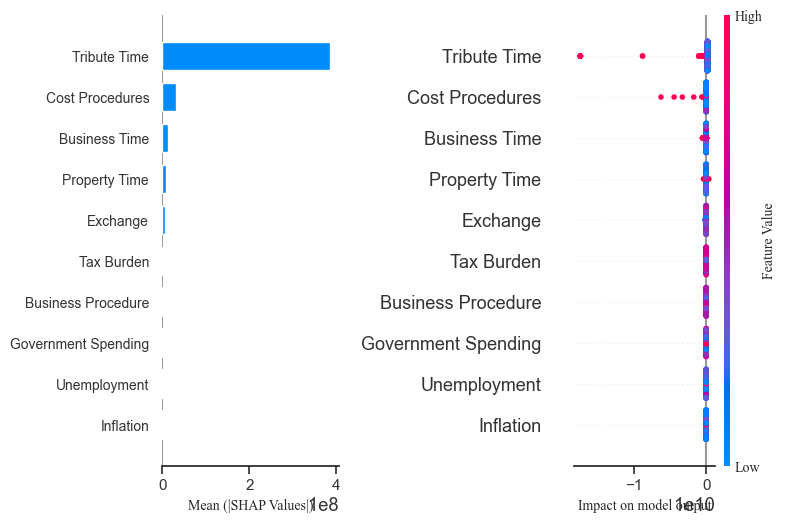

In [74]:
sns.set(style="white", font_scale=1.2)

# Aumentar o tamanho da figura
fig = plt.figure()
gs = GridSpec(1, 2, figure=fig)

f_1 = fig.add_subplot(gs[0])
shap.summary_plot(shap_values_sv, 
                  X_train, 
                  show=False,
                  max_display=10,
                 plot_type='bar')
# Alterar a fonte e os rótulos das variáveis no eixo y
plt.xlabel("Mean (|SHAP Values|)", fontname="Times New Roman", fontsize=10)
plt.tick_params(axis='y', labelsize=10)

f_2 = fig.add_subplot(gs[1])
shap.summary_plot(
    shap_values_sv, 
    X_train, 
    plot_type="dot",
    max_display=10, 
    auto_size_plot=False,
    show=False)
plt.xlabel("Impact on model output", fontname="Times New Roman", fontsize=10)

# Obter a colorbar atual
colorbar = plt.gcf().axes[-1]

# Alterar os rótulos da colorbar
colorbar.set_yticklabels(["Low", "High"], fontname="Times New Roman", fontsize=10)
colorbar.set_ylabel("Feature Value", fontname="Times New Roman", fontsize=10)

# Exibir a figura
plt.show()

### XGBoost

In [114]:
from xgboost import XGBRegressor

xgb_param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],  
    'max_depth': [3, 5, 10],  
    'n_estimators': [100, 200, 300],  
    'gamma': [0, 0.1, 0.2],  
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0]  
}

model_xgb = XGBRegressor()

kf = KFold(n_splits=5, shuffle=True, random_state=0)

xgb_grid_search = GridSearchCV(model_xgb, 
                                  xgb_param_grid, 
                                  scoring='neg_mean_absolute_percentage_error', 
                                  cv=kf,
                                  n_jobs=-1)

xgb_grid_search.fit(X_train_scaled, y_train)

# Get the best model
xgb_best_model = xgb_grid_search.best_estimator_

# Print the best parameters
print("\nBest Parameters: ", xgb_grid_search.best_params_)

# Get the best model
xgb_best_model = xgb_grid_search.best_estimator_

# Store fold scores for later calculations
all_fold_scores = []

# Print the mean and standard deviation of each fold in percentage
for i, (train_idx, test_idx) in enumerate(kf.split(X_train_scaled, y_train)):
    fold_scores = -xgb_grid_search.cv_results_['split{}_test_score'.format(i)]
    all_fold_scores.extend(fold_scores)  # Store fold scores for later calculations
    mean_fold_score = np.mean(fold_scores) * 100
    std_fold_score = np.std(fold_scores) * 100  

    print(f'Mean score for fold {i + 1}: {mean_fold_score:.2f}%, Standard Deviation: {std_fold_score:.2f}%')

# Calculate and print global mean and standard deviation
global_mean = np.mean(all_fold_scores) * 100
global_std = np.std(all_fold_scores) * 100
print(f'Global Mean: {global_mean:.2f}%, Global Standard Deviation: {global_std:.2f}%\n')

# Predictions and evaluations on test set
y_test_pred = xgb_grid_search.predict(X_test_scaled)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE) on test set: {mape_test:.2f}% \n')


Best Parameters:  {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.8}
Mean score for fold 1: 37.21%, Standard Deviation: 30.66%
Mean score for fold 2: 37.54%, Standard Deviation: 30.69%
Mean score for fold 3: 36.92%, Standard Deviation: 31.71%
Mean score for fold 4: 37.36%, Standard Deviation: 30.72%
Mean score for fold 5: 37.94%, Standard Deviation: 30.41%
Global Mean: 37.39%, Global Standard Deviation: 30.84%

Mean Absolute Percentage Error (MAPE) on test set: 8.89% 



In [115]:
explainer_xgb = shap.Explainer(xgb_best_model)
shap_values_xgb = explainer_xgb(X_train)

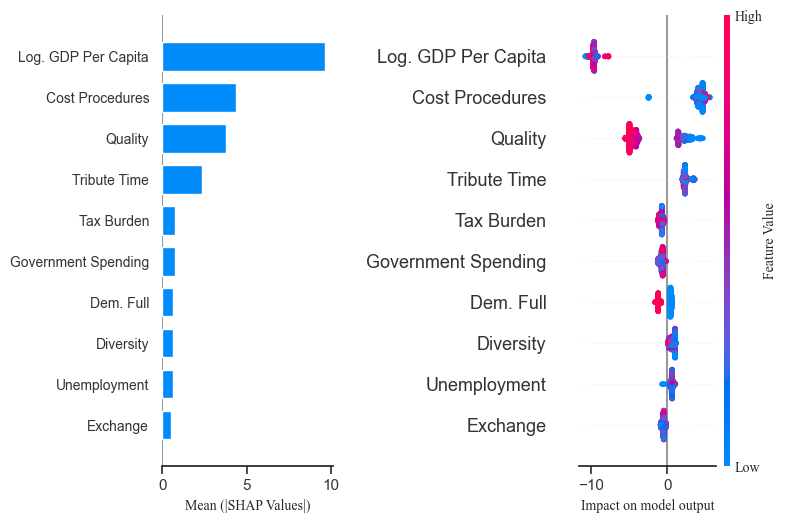

In [116]:
fig = plt.figure()
gs = GridSpec(1, 2, figure=fig)

f_1 = fig.add_subplot(gs[0])
shap.summary_plot(shap_values_xgb, 
                  X_train,
                  show=False,
                  max_display=10,
                 plot_type='bar')

plt.xlabel("Mean (|SHAP Values|)", fontname="Times New Roman", fontsize=10)
plt.tick_params(axis='y', labelsize=10)

f_2 = fig.add_subplot(gs[1])
shap.summary_plot(
    shap_values_xgb, 
    X_train,
    plot_type="dot",
    max_display=10, 
    auto_size_plot=False,
    show=False)
plt.xlabel("Impact on model output", fontname="Times New Roman", fontsize=10)

colorbar = plt.gcf().axes[-1]

colorbar.set_yticklabels(["Low", "High"], fontname="Times New Roman", fontsize=10)
colorbar.set_ylabel("Feature Value", fontname="Times New Roman", fontsize=10)

plt.show()

### LightGBM

In [33]:
from lightgbm import LGBMRegressor

lgb_param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],  
    'max_depth': [3, 5, 10],  
    'n_estimators': [100, 200, 300],  
    'num_leaves': [7, 10, 15, 30, 60]  
}

model_lgb = LGBMRegressor()

lgb_grid_search = GridSearchCV(model_lgb, 
                                  lgb_param_grid, 
                                  scoring='neg_mean_absolute_percentage_error', 
                                  cv=5,
                                  verbose=3,
                                  n_jobs=-1)

lgb_grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("\nBest Parameters: ", lgb_grid_search.best_params_)

# Get the best model
lgb_best_model = lgb_grid_search.best_estimator_

# Access cross-validation results
cv_results = lgb_grid_search.cv_results_

# Print mean and std for each fold
for fold_idx in range(lgb_grid_search.cv):
    mean_score = -cv_results[f"split{fold_idx}_test_score"].mean() * 100  
    std_score = cv_results[f"split{fold_idx}_test_score"].std() * 100  

# Calculate and print global mean and std
global_mean_score = -cv_results['mean_test_score'].mean() * 100  
global_std_score = cv_results['mean_test_score'].std() * 100  

print(f"\nOverall Mean Score on training set = {global_mean_score:.2f}%, Overall Std on training set= {global_std_score:.2f}%")

# Predictions and evaluations on test set
y_test_pred = lgb_grid_search.predict(X_test_scaled)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE) on test set: {mape_test:.2f}% \n')

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2905
[LightGBM] [Info] Number of data points in the train set: 1073, number of used features: 19
[LightGBM] [Info] Start training from score 28.912535
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [34]:
explainer_lgb = shap.Explainer(lgb_best_model)
shap_values_lgb = explainer_lgb(X_train)

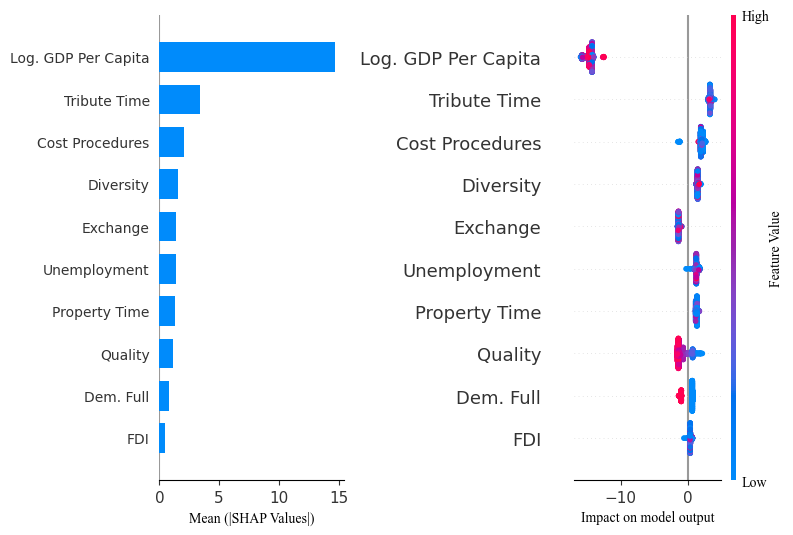

In [35]:
fig = plt.figure()
gs = GridSpec(1, 2, figure=fig)

f_1 = fig.add_subplot(gs[0])
shap.summary_plot(shap_values_lgb, 
                  X_train,
                  show=False,
                  max_display=10,
                 plot_type='bar')

plt.xlabel("Mean (|SHAP Values|)", fontname="Times New Roman", fontsize=10)
plt.tick_params(axis='y', labelsize=10)

f_2 = fig.add_subplot(gs[1])
shap.summary_plot(
    shap_values_lgb, 
    X_train,
    plot_type="dot",
    max_display=10, 
    auto_size_plot=False,
    show=False)
plt.xlabel("Impact on model output", fontname="Times New Roman", fontsize=10)

colorbar = plt.gcf().axes[-1]

colorbar.set_yticklabels(["Low", "High"], fontname="Times New Roman", fontsize=10)
colorbar.set_ylabel("Feature Value", fontname="Times New Roman", fontsize=10)

plt.show()

### CatBoost

In [37]:
from catboost import CatBoostRegressor

cb_param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],  
    'depth': [3, 5, 10],  
    'iterations': [100, 200, 300],  
}

model_cb = CatBoostRegressor()

cb_grid_search = GridSearchCV(model_cb, 
                                  cb_param_grid, 
                                  scoring='neg_mean_absolute_percentage_error', 
                                  cv=5,
                                  verbose=2,
                                  n_jobs=-1)

cb_grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("\nBest Parameters: ", cb_grid_search.best_params_)

# Get the best model
cb_best_model = cb_grid_search.best_estimator_

# Access cross-validation results
cv_results = cb_grid_search.cv_results_

# Print mean and std for each fold
for fold_idx in range(cb_grid_search.cv):
    mean_score = -cv_results[f"split{fold_idx}_test_score"].mean() * 100  
    std_score = cv_results[f"split{fold_idx}_test_score"].std() * 100

# Calculate and print global mean and std
global_mean_score = -cv_results['mean_test_score'].mean() * 100  
global_std_score = cv_results['mean_test_score'].std() * 100  

print(f"\nOverall Mean Score on training set = {global_mean_score:.2f}%, Overall Std on training set= {global_std_score:.2f}%")

# Predictions and evaluations on test set
y_test_pred = cb_grid_search.predict(X_test_scaled)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE) on test set: {mape_test:.2f}% \n')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
0:	learn: 12.3105157	total: 191ms	remaining: 57.2s
1:	learn: 11.5945216	total: 235ms	remaining: 35s
2:	learn: 11.0232184	total: 281ms	remaining: 27.9s
3:	learn: 10.4599508	total: 334ms	remaining: 24.7s
4:	learn: 9.9631164	total: 389ms	remaining: 23s
5:	learn: 9.4663544	total: 449ms	remaining: 22s
6:	learn: 9.0264610	total: 505ms	remaining: 21.1s
7:	learn: 8.6172155	total: 565ms	remaining: 20.6s
8:	learn: 8.2605397	total: 623ms	remaining: 20.1s
9:	learn: 7.8610427	total: 683ms	remaining: 19.8s
10:	learn: 7.5024348	total: 743ms	remaining: 19.5s
11:	learn: 7.2168824	total: 801ms	remaining: 19.2s
12:	learn: 6.9151293	total: 853ms	remaining: 18.8s
13:	learn: 6.6660712	total: 908ms	remaining: 18.5s
14:	learn: 6.4353720	total: 965ms	remaining: 18.3s
15:	learn: 6.1612989	total: 1.01s	remaining: 18s
16:	learn: 5.9134819	total: 1.06s	remaining: 17.7s
17:	learn: 5.7034643	total: 1.12s	remaining: 17.5s
18:	learn: 5.5095945	total: 1.17s	

In [38]:
explainer_cb = shap.Explainer(cb_best_model)
shap_values_cb = explainer_cb(X_train)

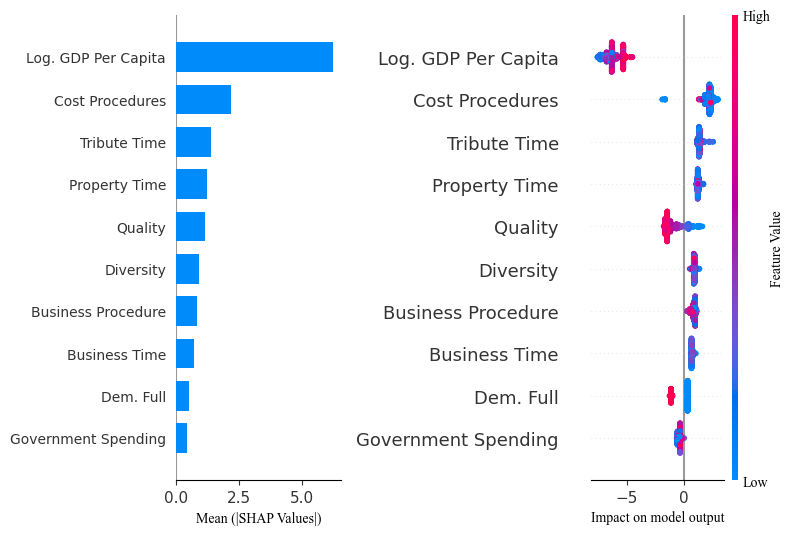

In [39]:
fig = plt.figure()
gs = GridSpec(1, 2, figure=fig)

f_1 = fig.add_subplot(gs[0])
shap.summary_plot(shap_values_cb, 
                  X_train,
                  show=False,
                  max_display=10,
                 plot_type='bar')

plt.xlabel("Mean (|SHAP Values|)", fontname="Times New Roman", fontsize=10)
plt.tick_params(axis='y', labelsize=10)

f_2 = fig.add_subplot(gs[1])
shap.summary_plot(
    shap_values_cb, 
    X_train,
    plot_type="dot",
    max_display=10, 
    auto_size_plot=False,
    show=False)
plt.xlabel("Impact on model output", fontname="Times New Roman", fontsize=10)

colorbar = plt.gcf().axes[-1]

colorbar.set_yticklabels(["Low", "High"], fontname="Times New Roman", fontsize=10)
colorbar.set_ylabel("Feature Value", fontname="Times New Roman", fontsize=10)

plt.show()

### Bagging

In [118]:
from sklearn.ensemble import BaggingRegressor

baggin_param_grid = {
    'n_estimators': [10, 50, 100],  
    'max_samples': [0.5, 0.7, 0.9],  
    'max_features': [0.5, 0.7, 0.9, 1],
    'bootstrap':[True, False] 
}

model_bagging = BaggingRegressor(random_state=0)

kf = KFold(n_splits=5, shuffle=True, random_state=0)

bagging_grid_search = GridSearchCV(model_bagging, 
                                  baggin_param_grid, 
                                  scoring='neg_mean_absolute_percentage_error', 
                                  cv=5,
                                  n_jobs=-1)

bagging_grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("\nBest Parameters: ", bagging_grid_search.best_params_)

# Get the best model
bagging_best_model = bagging_grid_search.best_estimator_

# Store fold scores for later calculations
all_fold_scores = []

# Print the mean and standard deviation of each fold in percentage
for i, (train_idx, test_idx) in enumerate(kf.split(X_train_scaled, y_train)):
    fold_scores = -bagging_grid_search.cv_results_['split{}_test_score'.format(i)]
    all_fold_scores.extend(fold_scores)  # Store fold scores for later calculations
    mean_fold_score = np.mean(fold_scores) * 100
    std_fold_score = np.std(fold_scores) * 100  

    print(f'Mean score for fold {i + 1}: {mean_fold_score:.2f}%, Standard Deviation: {std_fold_score:.2f}%')

# Calculate and print global mean and standard deviation
global_mean = np.mean(all_fold_scores) * 100
global_std = np.std(all_fold_scores) * 100
print(f'Global Mean: {global_mean:.2f}%, Global Standard Deviation: {global_std:.2f}%\n')

# Predictions and evaluations on test set
y_test_pred = bagging_grid_search.predict(X_test_scaled)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE) on test set: {mape_test:.2f}% \n')


Best Parameters:  {'bootstrap': False, 'max_features': 0.9, 'max_samples': 0.9, 'n_estimators': 100}
Mean score for fold 1: 20.17%, Standard Deviation: 13.34%
Mean score for fold 2: 18.15%, Standard Deviation: 13.17%
Mean score for fold 3: 18.18%, Standard Deviation: 11.10%
Mean score for fold 4: 18.71%, Standard Deviation: 14.59%
Mean score for fold 5: 18.97%, Standard Deviation: 11.80%
Global Mean: 18.83%, Global Standard Deviation: 12.88%

Mean Absolute Percentage Error (MAPE) on test set: 7.06% 



In [120]:
explainer_bg = shap.Explainer(bagging_best_model.predict, X_train)
shap_values_bg = explainer_bg(X_train)

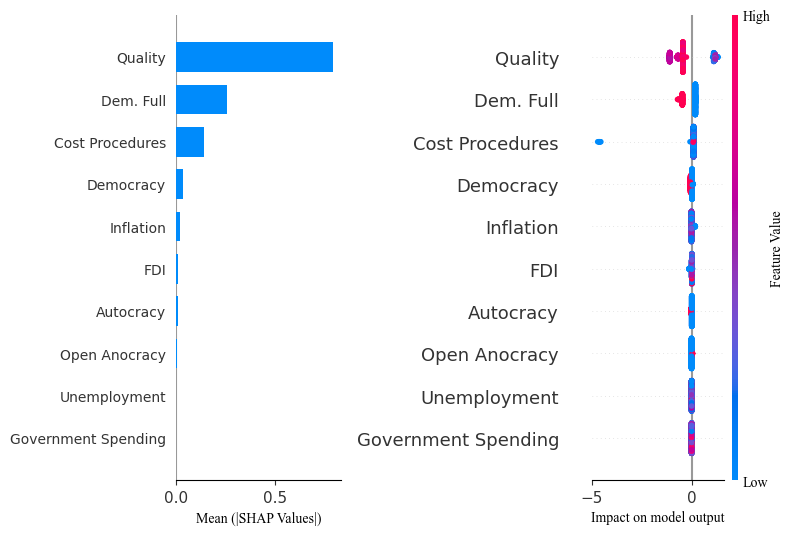

In [44]:
fig = plt.figure()
gs = GridSpec(1, 2, figure=fig)

f_1 = fig.add_subplot(gs[0])
shap.summary_plot(shap_values_bg, 
                  X_train,
                  show=False,
                  max_display=10,
                 plot_type='bar')

plt.xlabel("Mean (|SHAP Values|)", fontname="Times New Roman", fontsize=10)
plt.tick_params(axis='y', labelsize=10)

f_2 = fig.add_subplot(gs[1])
shap.summary_plot(
    shap_values_bg, 
    X_train,
    plot_type="dot",
    max_display=10, 
    auto_size_plot=False,
    show=False)
plt.xlabel("Impact on model output", fontname="Times New Roman", fontsize=10)

colorbar = plt.gcf().axes[-1]

colorbar.set_yticklabels(["Low", "High"], fontname="Times New Roman", fontsize=10)
colorbar.set_ylabel("Feature Value", fontname="Times New Roman", fontsize=10)

plt.show()

### Stacking

In [121]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor

# Base models
model1 = LinearRegression()
model2 = RandomForestRegressor()
model3 = GradientBoostingRegressor()

# Meta model
meta_model = StackingRegressor(
    estimators=[('lr', model1), ('rf', model2), ('gb', model3)],
    final_estimator=LinearRegression()
)

# Definir os parâmetros para a pesquisa em grade
stacking_param_grid = {
    'final_estimator__fit_intercept': [True, False],
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Criar o objeto GridSearchCV
stacking_grid_search = GridSearchCV(meta_model, 
                                    stacking_param_grid, 
                                    scoring='neg_mean_absolute_percentage_error', 
                                    cv=kf,
                                    n_jobs=-1)

stacking_grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("\nBest Parameters: ", stacking_grid_search.best_params_)

# Get the best model
stacking_best_model = stacking_grid_search.best_estimator_

# Store fold scores for later calculations
all_fold_scores = []

# Print the mean and standard deviation of each fold in percentage
for i, (train_idx, test_idx) in enumerate(kf.split(X_train_scaled, y_train)):
    fold_scores = -stacking_grid_search.cv_results_['split{}_test_score'.format(i)]
    all_fold_scores.extend(fold_scores)  
    mean_fold_score = np.mean(fold_scores) * 100
    std_fold_score = np.std(fold_scores) * 100  

    print(f'Mean score for fold {i + 1}: {mean_fold_score:.2f}%, Standard Deviation: {std_fold_score:.2f}%')

# Calculate and print global mean and standard deviation
global_mean = np.mean(all_fold_scores) * 100
global_std = np.std(all_fold_scores) * 100
print(f'Global Mean: {global_mean:.2f}%, Global Standard Deviation: {global_std:.2f}%\n')

# Predictions and evaluations on test set
y_test_pred = stacking_grid_search.predict(X_test_scaled)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE) on test set: {mape_test:.2f}% \n')


Best Parameters:  {'final_estimator__fit_intercept': True}
Mean score for fold 1: 9.80%, Standard Deviation: 0.01%
Mean score for fold 2: 12.26%, Standard Deviation: 0.12%
Mean score for fold 3: 10.04%, Standard Deviation: 0.09%
Mean score for fold 4: 9.53%, Standard Deviation: 0.02%
Mean score for fold 5: 11.19%, Standard Deviation: 0.01%
Global Mean: 10.57%, Global Standard Deviation: 1.02%

Mean Absolute Percentage Error (MAPE) on test set: 9.09% 



In [67]:
explainer_meta = shap.Explainer(stacking_best_model.predict, X_train)
shap_values_meta = explainer_meta(X_train)

Permutation explainer: 1074it [04:47,  3.61it/s]                          


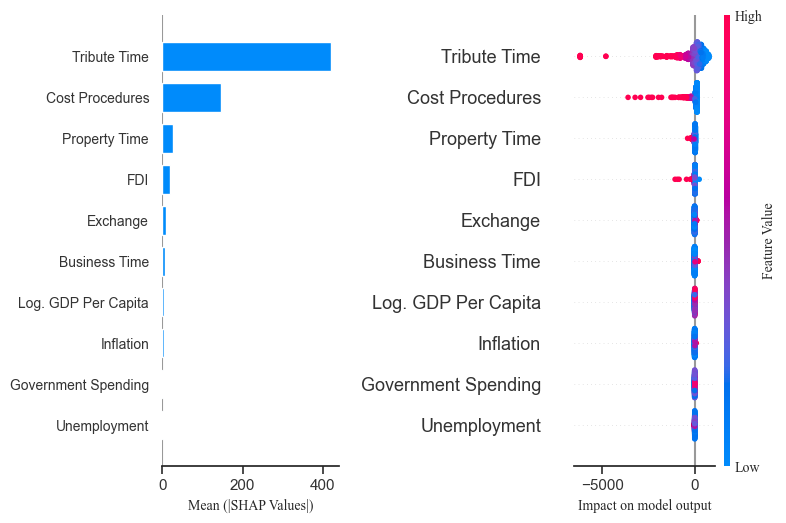

In [68]:
sns.set(style="white", font_scale=1.2)

fig = plt.figure()
gs = GridSpec(1, 2, figure=fig)

f_1 = fig.add_subplot(gs[0])
shap.summary_plot(shap_values_meta, 
                  X_train, 
                  show=False,
                  max_display=10,
                 plot_type='bar')

plt.xlabel("Mean (|SHAP Values|)", fontname="Times New Roman", fontsize=10)
plt.tick_params(axis='y', labelsize=10)

f_2 = fig.add_subplot(gs[1])
shap.summary_plot(
    shap_values_meta, 
    X_train,
    plot_type="dot",
    max_display=10, 
    auto_size_plot=False,
    show=False)
plt.xlabel("Impact on model output", fontname="Times New Roman", fontsize=10)

colorbar = plt.gcf().axes[-1]

colorbar.set_yticklabels(["Low", "High"], fontname="Times New Roman", fontsize=10)
colorbar.set_ylabel("Feature Value", fontname="Times New Roman", fontsize=10)

plt.show()

### Symbolic Regression

In [78]:
from gplearn.genetic import SymbolicRegressor

# Define the parameter grid
param_grid = {
    'population_size': [5000],
    'generations': [10],
    'stopping_criteria': [0.01],
    'p_crossover': [0.7],
    'p_subtree_mutation': [0.1],
    'p_hoist_mutation': [0.05],
    'p_point_mutation': [0.1],
    'max_samples': [0.9, 0.95],
    'parsimony_coefficient': [0.01, 0.1]
}

# Create the SymbolicRegressor
est_gp = SymbolicRegressor(random_state=0)

kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Create GridSearchCV
gp_grid_search = GridSearchCV(est_gp, 
                           param_grid, 
                           cv=kf, 
                           scoring='neg_mean_absolute_percentage_error', 
                           n_jobs=-1)

gp_grid_search.fit(X_train_scaled, y_train)

# Store fold scores for later calculations
all_fold_scores = []

# Print the mean and standard deviation of each fold in percentage
for i, (train_idx, test_idx) in enumerate(kf.split(X_train_scaled, y_train)):
    fold_scores = -gp_grid_search.cv_results_['split{}_test_score'.format(i)]
    all_fold_scores.extend(fold_scores)  # Store fold scores for later calculations
    mean_fold_score = np.mean(fold_scores) * 100
    std_fold_score = np.std(fold_scores) * 100  

    print(f'Mean score for fold {i + 1}: {mean_fold_score:.2f}%, Standard Deviation: {std_fold_score:.2f}%')

# Calculate and print global mean and standard deviation
global_mean = np.mean(all_fold_scores) * 100
global_std = np.std(all_fold_scores) * 100
print(f'Global Mean: {global_mean:.2f}%, Global Standard Deviation: {global_std:.2f}%\n')

# Predictions and evaluations on test set
y_test_pred = gp_grid_search.predict(X_test_scaled)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE) on test set: {mape_test:.2f}% \n')

KeyboardInterrupt: 

### MLP

In [77]:
from sklearn.neural_network import MLPRegressor

mlp_param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

mlp_reg = MLPRegressor(random_state=0)

kf = KFold(n_splits=5, shuffle=True, random_state=0)

mlp_grid_search = GridSearchCV(mlp_reg, 
                    mlp_param_grid,
                    scoring='neg_mean_absolute_percentage_error',  
                    cv=kf,
                    n_jobs=-1)

mlp_grid_search.fit(X_train_scaled, y_train)

# Get the best model
mlp_best_model = mlp_grid_search.best_estimator_

# Print the best parameters
print("\nBest Parameters: ", mlp_grid_search.best_params_)

# Store fold scores for later calculations
all_fold_scores = []

# Print the mean and standard deviation of each fold in percentage
for i, (train_idx, test_idx) in enumerate(kf.split(X_train_scaled, y_train)):
    fold_scores = -mlp_grid_search.cv_results_['split{}_test_score'.format(i)]
    all_fold_scores.extend(fold_scores)  # Store fold scores for later calculations
    mean_fold_score = np.mean(fold_scores) * 100
    std_fold_score = np.std(fold_scores) * 100  

    print(f'Mean score for fold {i + 1}: {mean_fold_score:.2f}%, Standard Deviation: {std_fold_score:.2f}%')

# Calculate and print global mean and standard deviation
global_mean = np.mean(all_fold_scores) * 100
global_std = np.std(all_fold_scores) * 100
print(f'Global Mean: {global_mean:.2f}%, Global Standard Deviation: {global_std:.2f}%\n')

# Predictions and evaluations on test set
y_test_pred = mlp_grid_search.predict(X_test_scaled)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE) on test set: {mape_test:.2f}% \n')


Best Parameters:  {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (120, 80, 40), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'sgd'}
Mean score for fold 1: 34.41%, Standard Deviation: 14.21%
Mean score for fold 2: 28.48%, Standard Deviation: 9.17%
Mean score for fold 3: 27.26%, Standard Deviation: 8.78%
Mean score for fold 4: 34.23%, Standard Deviation: 9.61%
Mean score for fold 5: 30.61%, Standard Deviation: 9.71%
Global Mean: 31.00%, Global Standard Deviation: 10.88%

Mean Absolute Percentage Error (MAPE) on test set: 17.90% 

